In [1]:
from keras.utils import to_categorical
!pip install keras_preprocessing
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = r"D:\Face Emotion Recognition\train"
TEST_DIR =  r"D:\Face Emotion Recognition\test"

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                   image     label
0      D:\Face Emotion Recognition\train\angry\Traini...     angry
1      D:\Face Emotion Recognition\train\angry\Traini...     angry
2      D:\Face Emotion Recognition\train\angry\Traini...     angry
3      D:\Face Emotion Recognition\train\angry\Traini...     angry
4      D:\Face Emotion Recognition\train\angry\Traini...     angry
...                                                  ...       ...
28704  D:\Face Emotion Recognition\train\surprise\Tra...  surprise
28705  D:\Face Emotion Recognition\train\surprise\Tra...  surprise
28706  D:\Face Emotion Recognition\train\surprise\Tra...  surprise
28707  D:\Face Emotion Recognition\train\surprise\Tra...  surprise
28708  D:\Face Emotion Recognition\train\surprise\Tra...  surprise

[28709 rows x 2 columns]


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                  image     label
0     D:\Face Emotion Recognition\test\angry\Private...     angry
1     D:\Face Emotion Recognition\test\angry\Private...     angry
2     D:\Face Emotion Recognition\test\angry\Private...     angry
3     D:\Face Emotion Recognition\test\angry\Private...     angry
4     D:\Face Emotion Recognition\test\angry\Private...     angry
...                                                 ...       ...
7019  D:\Face Emotion Recognition\test\surprise\Publ...  surprise
7020  D:\Face Emotion Recognition\test\surprise\Publ...  surprise
7021  D:\Face Emotion Recognition\test\surprise\Publ...  surprise
7022  D:\Face Emotion Recognition\test\surprise\Publ...  surprise
7023  D:\Face Emotion Recognition\test\surprise\Publ...  surprise

[7024 rows x 2 columns]


In [6]:
from tqdm.notebook import tqdm

In [7]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [8]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7024 [00:00<?, ?it/s]

In [9]:
x_train = train_features / 255.0
x_test = test_features / 255.0

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [11]:
from tensorflow.keras.optimizers import Adam

# sequential model
model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# flattening
model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

# model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
 27/225 ━━━━━━━━━━━━━━━━━━━━ 2:14 677ms/step - accuracy: 0.2350 - loss: 1.8705

KeyboardInterrupt: 

In [13]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [14]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [15]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [16]:
image = r"D:\ML Project\train\sad\Training_120178.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad


C:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ML Project\\train\\sad\\Training_120178.jpg'

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
model prediction is  happy


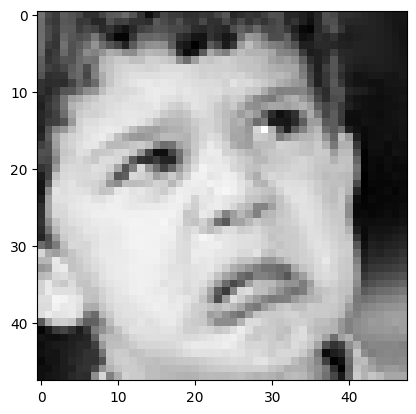

In [19]:
image = r"D:\Face Emotion Recognition\train\sad\Training_120178.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
model prediction is  happy


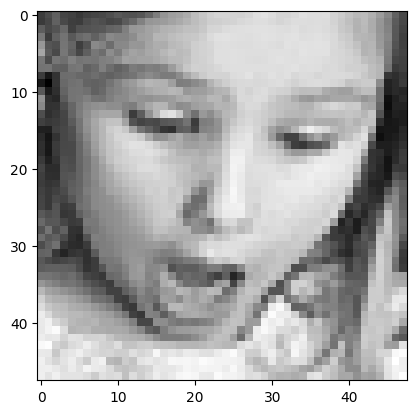

In [26]:
image = r"D:\Face Emotion Reco\train\fear\Training_536165.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the pre-trained model architecture from JSON file
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Load the pre-trained model weights
model.load_weights("facialemotionmodel.h5")

# Load the Haar cascade classifier for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Define a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Open the webcam (camera)
webcam = cv2.VideoCapture(0)

# Define labels for emotion classes
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    # Read a frame from the webcam
    i, im = webcam.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)

    try:
        # For each detected face, perform facial emotion recognition
        for (p, q, r, s) in faces:
            # Extract the region of interest (ROI) which contains the face
            image = gray[q:q + s, p:p + r]

            # Draw a rectangle around the detected face
            cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 2)

            # Resize the face image to the required input size (48x48)
            image = cv2.resize(image, (48, 48))

            # Extract features from the resized face image
            img = extract_features(image)

            # Make a prediction using the trained model
            pred = model.predict(img)

            # Get the predicted label for emotion
            prediction_label = labels[pred.argmax()]

            # Display the predicted emotion label near the detected face
            cv2.putText(im, f'Emotion: {prediction_label}', (p - 10, q - 10),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))

        # Display the frame with annotations in real-time
        cv2.imshow("Real-time Facial Emotion Recognition", im)

        # Break the loop if the 'Esc' key is pressed
        if cv2.waitKey(1) == 27:
            break

    except cv2.error:
        pass

# Release the webcam and close all OpenCV windows
webcam.release()
cv2.destroyAllWindows()